In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.animation
from fipy import Variable, FaceVariable, CellVariable, Grid1D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer
from fipy.tools import numerix
from IPython.display import display, clear_output


In [2]:
nx = 50
dx = 0.02

mesh = Grid1D(nx=nx, dx=dx)
x = mesh.cellCenters[0]

L = nx * dx
phi = CellVariable(mesh=mesh, name=r"$\phi$")

# set D for water
D = CellVariable(mesh=mesh, value=0.14)

# set D for metal
D.setValue(11., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))

# set water temperature
phi.value = 26

# set metal tmeperature
phi.setValue(750., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))


eq =(TransientTerm() == DiffusionTerm(D))



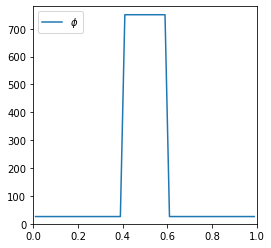

In [3]:
viewer = Viewer(vars=phi, datamin=0, datamax=780,xmin = 0,xmax = 1)

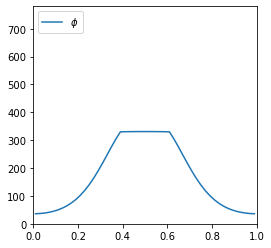

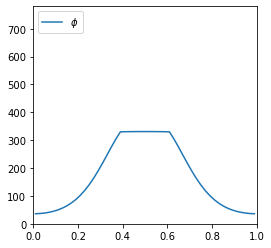

In [4]:
D = CellVariable(mesh=mesh, value=0.14)
D.setValue(11., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))
phi.value = 26
phi.setValue(750., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))
eq =(TransientTerm() == DiffusionTerm(D))
viewer = Viewer(vars=phi, datamin=0, datamax=780,xmin = 0,xmax = 1)
for i in range(5):
    eq.solve(var=phi,dt=0.015)
viewer.plot()


In [5]:
from fipy import CellVariable, Grid2D, Viewer, TransientTerm, DiffusionTerm
from fipy.tools import numerix

In [6]:
nx = 20
ny = nx
dx = 1.
dy = dx
L = dx * nx
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)
phi = CellVariable(name = "solution variable",mesh = mesh,value = 0)
D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)

In [7]:
X, Y = mesh.faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > L / 2))|(mesh.facesTop & (X < L / 2)))
facesBottomRight = ((mesh.facesRight & (Y < L / 2))|(mesh.facesBottom & (X > L / 2)))

In [8]:
phi.constrain(valueBottomRight, facesBottomRight)

NameError: name 'valueBottomRight' is not defined

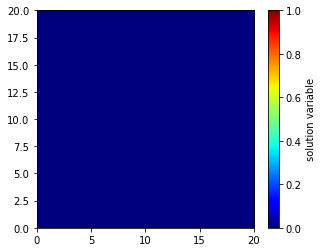

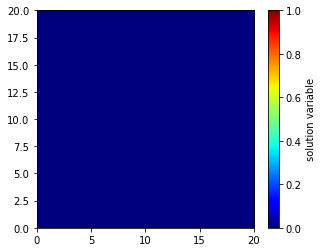

In [ ]:
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=0., datamax=1.)
    viewer.plot()

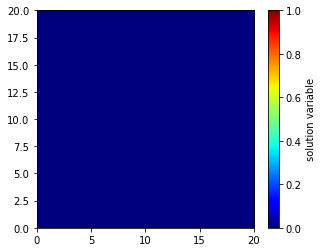

<Figure size 432x288 with 0 Axes>

In [ ]:
timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 10
from builtins import range
for step in range(steps):
     eq.solve(var=phi,
              dt=timeStepDuration)
     if __name__ == '__main__':
         viewer.plot()